# Loan_Predication problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

The details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Processing

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
## loading the dataset to pandas DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the shape of the dataset
df.shape

(614, 13)

In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
#statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Checking the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isnull().sum().sum()

149

In [10]:
# Replacing the missing values for numerical terms using mean...
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [15]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

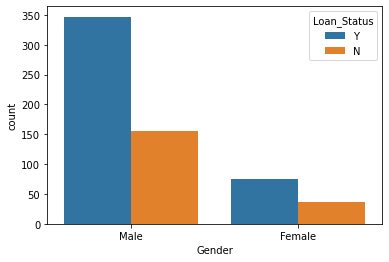

In [17]:
#Categorical attributes visualisation
sns.countplot(df['Gender'], hue=df['Loan_Status'])

In [18]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

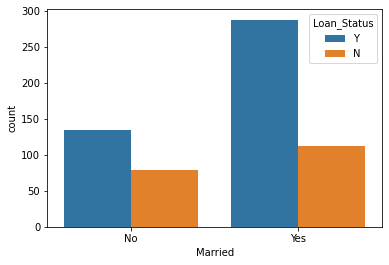

In [19]:
sns.countplot(df['Married'], hue=df['Loan_Status'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

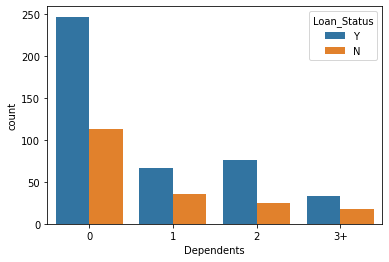

In [20]:
sns.countplot(df['Dependents'], hue=df['Loan_Status'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

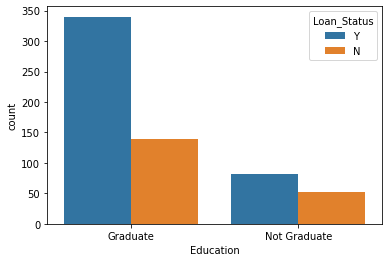

In [21]:
sns.countplot(df['Education'], hue=df['Loan_Status'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

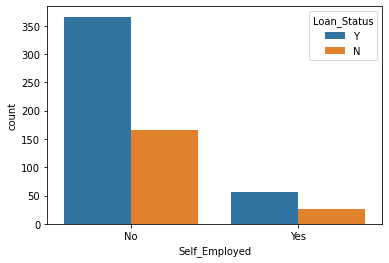

In [22]:
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

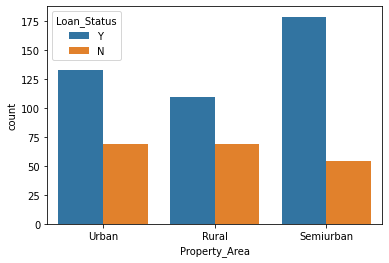

In [23]:
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

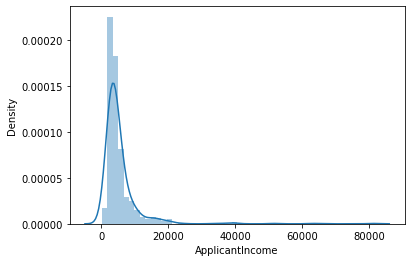

In [24]:
#Numerical data visualisation
sns.distplot(df['ApplicantIncome'])

In [25]:
#The distribution is right skewed. So lets apply log transformation for getting the normal distribution.
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

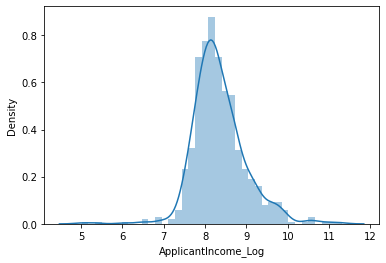

In [26]:
sns.distplot(df['ApplicantIncome_Log'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
 13  ApplicantIncome_Log  614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

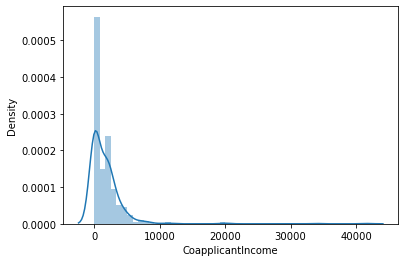

In [28]:
sns.distplot(df['CoapplicantIncome'])

In [29]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome'])

C:\Users\padma\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='CoapplicantIncome_Log', ylabel='Count'>

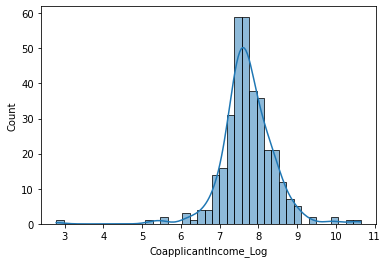

In [30]:
sns.histplot(df['CoapplicantIncome_Log'], kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

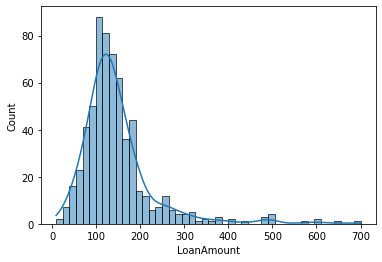

In [31]:
sns.histplot(df['LoanAmount'], kde=True)

In [32]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

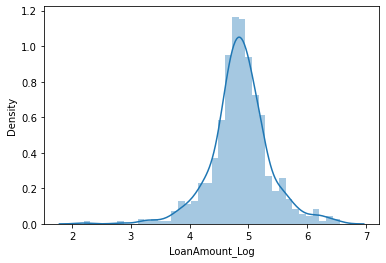

In [33]:
sns.distplot(df['LoanAmount_Log'], kde=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

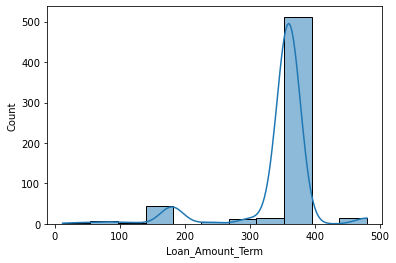

In [34]:
sns.histplot(df['Loan_Amount_Term'], kde=True)

In [35]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Count'>

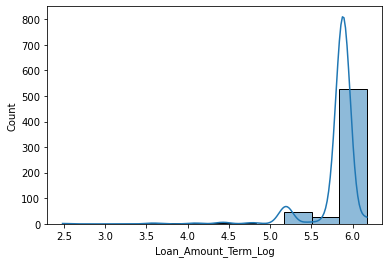

In [36]:
sns.histplot(df['Loan_Amount_Term_Log'], kde=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

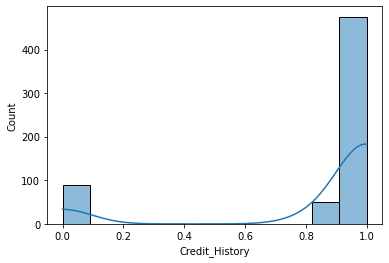

In [37]:
sns.histplot(df['Credit_History'], kde=True)

# Create a new feature

In [38]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

<AxesSubplot:xlabel='Total_income', ylabel='Count'>

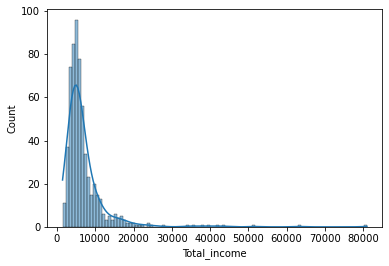

In [39]:
sns.histplot(df['Total_income'], kde = True)

In [40]:
df['Total_income_Log'] = np.log(df['Total_income'])

<AxesSubplot:xlabel='Total_income_Log', ylabel='Count'>

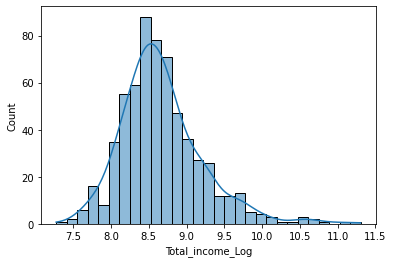

In [41]:
sns.histplot(df['Total_income_Log'], kde = True)

# Correlation Coefficients

In [42]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income,Total_income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.790532,0.108432,0.434849,-0.024085,0.893037,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.237900,0.711061,0.204179,-0.042941,0.342781,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.551556,0.417763,0.895324,0.044905,0.620102,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.030739,-0.079338,0.086531,0.938871,-0.069830,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.019169,-0.063210,-0.025248,-0.007860,-0.014447,0.019156
ApplicantIncome_Log,0.790532,-0.237900,0.551556,-0.030739,0.019169,1.000000,0.021399,0.491066,-0.014618,0.639953,0.740300
CoapplicantIncome_Log,0.108432,0.711061,0.417763,-0.079338,-0.063210,0.021399,1.000000,0.393070,-0.055967,0.585476,0.649026
LoanAmount_Log,0.434849,0.204179,0.895324,0.086531,-0.025248,0.491066,0.393070,1.000000,0.084534,0.503817,0.657507
Loan_Amount_Term_Log,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.014618,-0.055967,0.084534,1.000000,-0.042237,-0.029522
Total_income,0.893037,0.342781,0.620102,-0.069830,-0.014447,0.639953,0.585476,0.503817,-0.042237,1.000000,0.852873


In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income,Total_income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0,8.699515


In [44]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [45]:
cols = ['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'CoapplicantIncome_Log', 'Total_income']
df = df.drop(cols,axis = 1)

In [46]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncome_Log',
       'LoanAmount_Log', 'Loan_Amount_Term_Log', 'Total_income_Log'],
      dtype='object')

# Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
cols = ['Gender', 'Married',  'Education', 'Self_Employed','Property_Area', 'Loan_Status', 'Dependents']

In [50]:
le = LabelEncoder()

In [51]:

for col in cols:
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train-test-split

In [53]:
X = df.drop('Loan_Status', axis = 1)

In [54]:
y = df['Loan_Status']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (460, 11) (154, 11)


# Model Training

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    print('Training_data_Accuracy_score: ', accuracy_score(prediction_train, y_train))
    print('Testing_data_Accuracy_score: ', accuracy_score(prediction_test, y_test))
    print('Training_data_classification_report: \n', classification_report(prediction_train, y_train))
    print('Testing_data_classification_report: \n', classification_report(prediction_test, y_test)) 
    print('Training_data_Confusion_matrix: \n', confusion_matrix(prediction_train, y_train))
    print('Testing_data_Confusion_matrix: \n', confusion_matrix(prediction_test, y_test))
    score = cross_val_score(model, X, y, cv = 5)
    
    print('Cross_validation_Score: ', np.mean(score))

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
classify(model, X, y)

Training_data_Accuracy_score:  0.8217391304347826
Testing_data_Accuracy_score:  0.7727272727272727
Training_data_classification_report: 
               precision    recall  f1-score   support

           0       0.44      0.92      0.60        66
           1       0.98      0.80      0.89       394

    accuracy                           0.82       460
   macro avg       0.71      0.86      0.74       460
weighted avg       0.91      0.82      0.84       460

Testing_data_classification_report: 
               precision    recall  f1-score   support

           0       0.39      0.91      0.55        23
           1       0.98      0.75      0.85       131

    accuracy                           0.77       154
   macro avg       0.68      0.83      0.70       154
weighted avg       0.89      0.77      0.80       154

Training_data_Confusion_matrix: 
 [[ 61   5]
 [ 77 317]]
Testing_data_Confusion_matrix: 
 [[21  2]
 [33 98]]
Cross_validation_Score:  0.809462881514061


# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [75]:
classify(model, X , y)

Training_data_Accuracy_score:  1.0
Testing_data_Accuracy_score:  0.7272727272727273
Training_data_classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

Testing_data_classification_report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60        52
           1       0.80      0.78      0.79       102

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Training_data_Confusion_matrix: 
 [[138   0]
 [  0 322]]
Testing_data_Confusion_matrix: 
 [[32 20]
 [22 80]]
Cross_validation_Score:  0.7166066906570705


# Random forest classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 4, n_estimators = 45)

In [64]:
classify(model, X, y)

Training_data_Accuracy_score:  1.0
Testing_data_Accuracy_score:  0.7792207792207793
Training_data_classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

Testing_data_classification_report: 
               precision    recall  f1-score   support

           0       0.46      0.83      0.60        30
           1       0.95      0.77      0.85       124

    accuracy                           0.78       154
   macro avg       0.71      0.80      0.72       154
weighted avg       0.86      0.78      0.80       154

Training_data_Confusion_matrix: 
 [[138   0]
 [  0 322]]
Testing_data_Confusion_matrix: 
 [[25  5]
 [29 95]]
Training_data_R2_Score:  1.0
Testing_data_R2_Score:  -0.4075268817204305
Cro

# Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
gscv = GridSearchCV(model, param_grid={'n_estimators': list(range(0,50)), 'max_depth': list(range(0,10))}, scoring = 'accuracy', cv = 5)

In [81]:
gscv.fit(X_train, y_train)

C:\Users\padma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
295 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\padma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\padma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\padma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater tha

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=45),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='accuracy')

In [82]:
gscv.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [83]:
classify(model, X, y)

Training_data_Accuracy_score:  0.8326086956521739
Testing_data_Accuracy_score:  0.7727272727272727
Training_data_classification_report: 
               precision    recall  f1-score   support

           0       0.48      0.93      0.63        71
           1       0.98      0.81      0.89       389

    accuracy                           0.83       460
   macro avg       0.73      0.87      0.76       460
weighted avg       0.91      0.83      0.85       460

Testing_data_classification_report: 
               precision    recall  f1-score   support

           0       0.39      0.91      0.55        23
           1       0.98      0.75      0.85       131

    accuracy                           0.77       154
   macro avg       0.68      0.83      0.70       154
weighted avg       0.89      0.77      0.80       154

Training_data_Confusion_matrix: 
 [[ 66   5]
 [ 72 317]]
Testing_data_Confusion_matrix: 
 [[21  2]
 [33 98]]
Cross_validation_Score:  0.8013328002132478
